# Tarea - Caminata aleatoria

Terezza Marianne Gonzalez Jauregui

17/octubre/2024

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D.

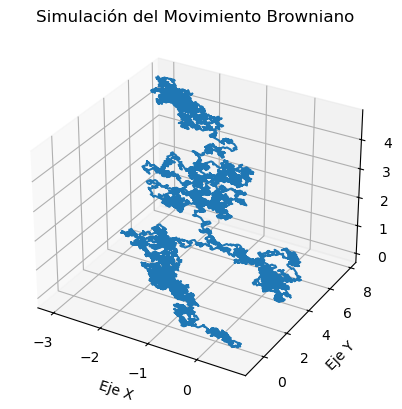

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random

inter=[-1,1]
Dt=0.001
t=10
paso=int(t/Dt)

W_x = np.zeros(steps)
W_y = np.zeros(steps)
W_z = np.zeros(steps)

# Simulación del movimiento browniano
for i in range(1, paso):
    X_i = np.random.choice(inter)  # Elección aleatoria entre -1 y 1
    W_x[i] = W_x[i-1] + X_i * np.sqrt(Dt)
    
    X_i = np.random.choice(inter)
    W_y[i] = W_y[i-1] + X_i * np.sqrt(Dt)
    
    X_i = np.random.choice(inter)
    W_z[i] = W_z[i-1] + X_i * np.sqrt(Dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(W_x, W_y, W_z)
ax.set_title('Simulación del Movimiento Browniano')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

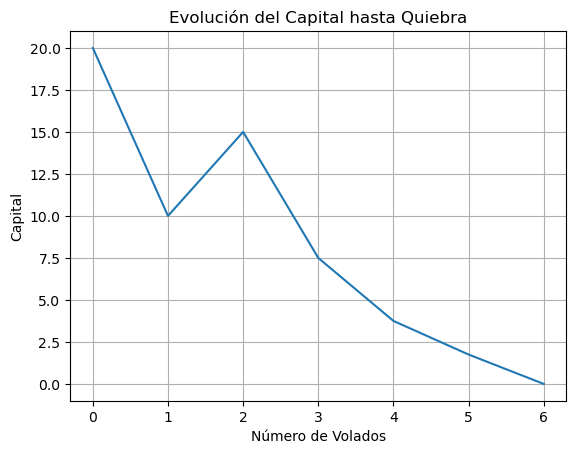

Promedio de volados para quedar en quiebra: 26.34


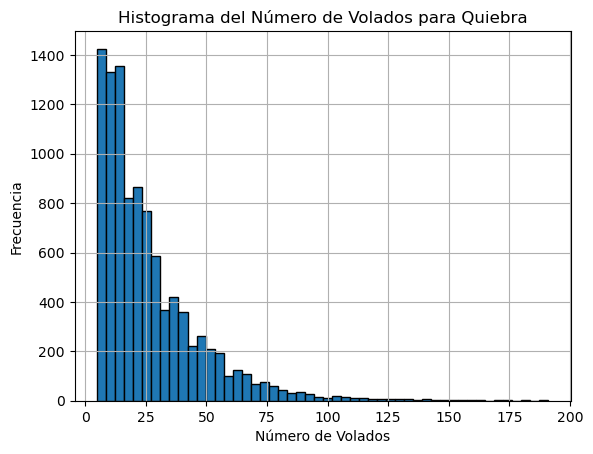

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Función para simular un juego de apuestas hasta quedar en quiebra
def apostar(capital_inicial):
    capital = capital_inicial
    capital_hist = [capital]  # Almacenamos la evolución del capital

    while capital > 0:
        # Elegimos aleatoriamente el resultado del volado
        volado = np.random.choice([-1, 1])  # -1 es perder, 1 es ganar
        # Determinamos la apuesta en función del capital
        if capital >= 6:
            apuesta = capital / 2
        else:
            apuesta = 2
        # Actualizamos el capital
        capital = capital + volado * apuesta
        capital = max(capital, 0)  # No puede ser menor a cero
        capital_hist.append(capital)

    return capital_hist

# 1. Graficar la evolución del capital
capital_inicial = 20
evolucion_capital = apostar(capital_inicial)

plt.figure()
plt.plot(evolucion_capital)
plt.title("Evolución del Capital hasta Quiebra")
plt.xlabel("Número de Volados")
plt.ylabel("Capital")
plt.grid(True)
plt.show()

# 2. Simulación Montecarlo para encontrar el número de volados promedio
n_simulaciones = 10000
tiempos_a_quiebra = []

for _ in range(n_simulaciones):
    evolucion_capital = apostar(capital_inicial)
    tiempos_a_quiebra.append(len(evolucion_capital) - 1)  # Número de volados

# Promedio de volados hasta quedar en quiebra
promedio_volados = np.mean(tiempos_a_quiebra)
print(f"Promedio de volados para quedar en quiebra: {promedio_volados:.2f}")

# 3. Histograma del número de volados
plt.figure()
plt.hist(tiempos_a_quiebra, bins=50, edgecolor='black')
plt.title("Histograma del Número de Volados para Quiebra")
plt.xlabel("Número de Volados")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


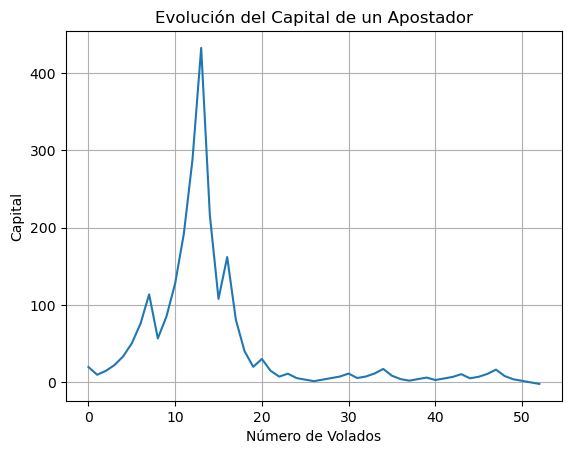

Número promedio de volados hasta quiebra: 26.2544


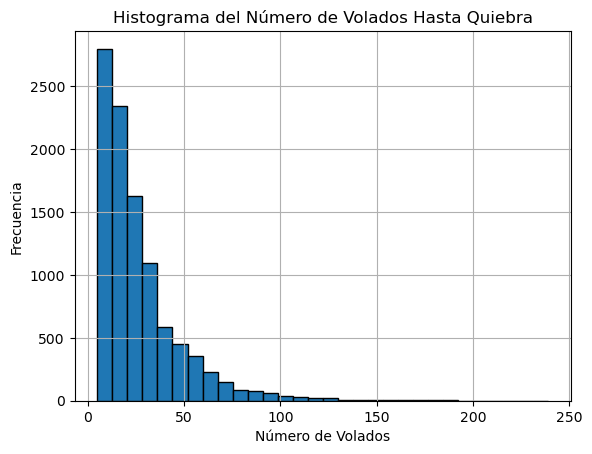

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def apuesta_arriesgada(inicial=20):
    capital = inicial
    capital_history = [capital]
    
    while capital > 0:
        if capital >= 6:
            apuesta = capital / 2
        else:
            apuesta = 2
        
        resultado = np.random.choice(["ganar", "perder"])  # Simulación de volado
        
        if resultado == "ganar":
            capital += apuesta
        else:
            capital -= apuesta
        
        capital_history.append(capital)
    
    return capital_history

# Simulación de múltiples apostadores
num_simulaciones = 10000
historiales = []

for _ in range(num_simulaciones):
    historial = apuesta_arriesgada()
    historiales.append(historial)

# Gráfica de la evolución del capital de un apostador
plt.figure()
plt.plot(historiales[0])
plt.title('Evolución del Capital de un Apostador')
plt.xlabel('Número de Volados')
plt.ylabel('Capital')
plt.grid()
plt.show()

# Análisis Monte Carlo para el número promedio de volados hasta quiebra
num_volados_hasta_quiebra = [len(historial) - 1 for historial in historiales]
promedio_volados = np.mean(num_volados_hasta_quiebra)

print(f"Número promedio de volados hasta quiebra: {promedio_volados}")

# Histograma del número de volados hasta quiebra
plt.figure()
plt.hist(num_volados_hasta_quiebra, bins=30, edgecolor='black')
plt.title('Histograma del Número de Volados Hasta Quiebra')
plt.xlabel('Número de Volados')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()